<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Проверка-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-расчета-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчета эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Сравнение-распределений-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравнение-распределений-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределений размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях." data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import display
pd.set_option('display.max_columns', None)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings("ignore")

### Изучение данных

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
display(train.head())
display(test.head())
display(full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [4]:
tables = [train, test, full]

**Описание данных:**  

**Технологический процесс**  
Rougher feed — исходное сырье  
Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant  
- Xanthate — ксантогенат (промотер, или активатор флотации);  
- Sulphate — сульфат (на данном производстве сульфид натрия);  
- Depressant — депрессант (силикат натрия).  

Rougher process (англ. «грубый процесс») — флотация  
Rougher tails — отвальные хвосты  
Float banks — флотационная установка  
Cleaner process — очистка  
Rougher Au — черновой концентрат золота  
Final Au — финальный концентрат золота  

**Параметры этапов**  
air amount — объём воздуха  
fluid levels — уровень жидкости  
feed size — размер гранул сырья  
feed rate — скорость подачи  

**Наименование признаков:**  

[этап].[тип_параметра].[название_параметра]  
Пример: rougher.input.feed_ag  

**Возможные значения для блока [этап]:**  
rougher — флотация  
primary_cleaner — первичная очистка  
secondary_cleaner — вторичная очистка  
final — финальные характеристики  

**Возможные значения для блока [тип_параметра]:**  
input — параметры сырья  
output — параметры продукта  
state — параметры, характеризующие текущее состояние этапа  
calculation — расчётные характеристики  

In [5]:
print(train.info())
print(test.info())
print(full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

**Данные для обучения:**
- 87 колонок
- 16860 строк
- есть пропуски в данных

**Данные для теста:**
- 53 колонки
- 5856 строк
- есть пропуски в данных

**Полный датасет:**
- 87 колонок
- 22716 строк
- есть пропуски в данных

Изменим тип данных в колонке с датой:

In [6]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')
full['date'] = pd.to_datetime(full['date'], format='%Y-%m-%d')

Посмотрим на распределение данных по датам:

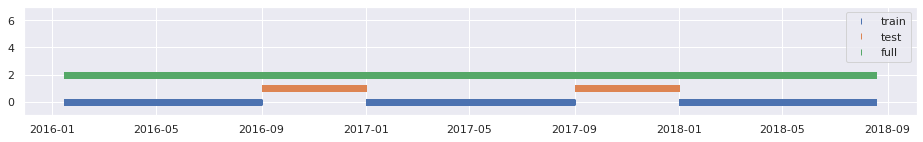

In [7]:
plt.figure(figsize=(16,2))

plt.plot(train['date'], [0]*len(train['date']), '|', label = 'train')
plt.plot(test['date'], [1]*len(test['date']), '|', label = 'test')
plt.plot(full['date'], [2]*len(full['date']), '|', label = 'full')
plt.ylim(-1, 7)
plt.legend();

На графике видно как полный датасет был разделен на тренировочный и тестовый.  
В данных скорее всего нет временной зависимости, так что все в порядке.  
Проверим полный датасет на дубликаты.

In [8]:
full.duplicated().sum()

0

### Проверка расчета эффективности обогащения

Нужно смоделировать процесс восстановления золота из золотосодержащей руды. Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

Эффективность обогащения рассчитывается по формуле:  

Recovery = C * (F-T) / F * (C-T) * 100%

где:  
C — доля золота в концентрате после флотации/очистки;  
F — доля золота в сырье/концентрате до флотации/очистки;  
T — доля золота в отвальных хвостах после флотации/очистки.  

In [9]:
train.dropna(subset=['rougher.output.concentrate_au', 'rougher.input.feed_au', 
                     'rougher.output.tail_au','rougher.output.recovery'], inplace=True)

In [10]:
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']
calculated_recovery = (C*(F-T))/(F*(C-T))*100
recovery = train['rougher.output.recovery']
print('Абсолютная средняя ошибка:', mean_absolute_error(recovery, calculated_recovery))

Абсолютная средняя ошибка: 9.444891926100695e-15


Значение близко к нулю, значит расчет корректный.

### Анализ признаков, недоступных в тестовой выборке

Посмотрим какие признаки есть в тренировочном датасете, но нет в тестовом:

In [11]:
set(train.columns) - set(test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке нет признаков output, так как это целевые признаки.
Так же в тесте нет признаков calculation для этапа rougher, видимо эти данные рассчитываются позднее и не доступны во время процесса.

### Предобработка данных

Изучим пропуски в данных:

In [12]:
def isnull(df):
    df_isnull = df.isnull().sum().to_frame(name = 'Количество пропусков')
    df_isnull['Процент пропусков'] = df.isna().mean()*100
    df_sorted = df_isnull.sort_values(by=['Процент пропусков'],ascending=False).head(15)
    return df_sorted

In [13]:
#Пропуски в полном датасете
display(isnull(full))

,Количество пропусков,Процент пропусков
rougher.output.recovery,3119,13.730410
rougher.output.tail_ag,2737,12.048776
rougher.output.tail_au,2736,12.044374
rougher.output.tail_sol,2736,12.044374
rougher.input.floatbank11_xanthate,2257,9.935728
secondary_cleaner.output.tail_sol,2215,9.750836
final.output.recovery,1963,8.641486
rougher.calculation.au_pb_ratio,1627,7.162353
primary_cleaner.input.sulfate,1609,7.083113
primary_cleaner.input.depressant,1546,6.805776


In [32]:
#Пропуски в тренировочном датасете
display(isnull(train))

,Количество пропусков,Процент пропусков
date,0,0.0
rougher.state.floatbank10_b_air,0,0.0
rougher.state.floatbank10_f_air,0,0.0
rougher.state.floatbank10_e_level,0,0.0
rougher.state.floatbank10_e_air,0,0.0
rougher.state.floatbank10_d_level,0,0.0
rougher.state.floatbank10_d_air,0,0.0
rougher.state.floatbank10_c_level,0,0.0
rougher.state.floatbank10_c_air,0,0.0
rougher.state.floatbank10_b_level,0,0.0


In [15]:
#Пропуски в тестовом датасете
display(isnull(test))

,Количество пропусков,Процент пропусков
rougher.input.floatbank11_xanthate,353,6.028005
primary_cleaner.input.sulfate,302,5.157104
primary_cleaner.input.depressant,284,4.849727
rougher.input.floatbank10_sulfate,257,4.388661
primary_cleaner.input.xanthate,166,2.834699
rougher.input.floatbank10_xanthate,123,2.100410
rougher.input.feed_sol,67,1.144126
rougher.input.floatbank11_sulfate,55,0.939208
rougher.input.feed_rate,40,0.683060
secondary_cleaner.state.floatbank3_a_air,34,0.580601


Строки с пропусками в целевых признаках удаляем полностью.

In [16]:
targets_cols = ['rougher.output.recovery','final.output.recovery']

In [29]:
train[targets_cols].isna().sum()

rougher.output.recovery    0
final.output.recovery      0
dtype: int64

In [28]:
full[targets_cols].isna().sum()

rougher.output.recovery    0
final.output.recovery      0
dtype: int64

In [30]:
print(full.shape)
print(train.shape)

(19439, 87)
(14149, 87)


In [26]:
train = train.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'])
full = full.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'])

Далее заполним пропуски методом ffil. Этот метод заполнит пропусками предыдущими значениями, что по постановке задачи звучит наиболее логично, так как данные связаны логически технологическим процессом.

In [31]:
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')
full = full.fillna(method='ffill')

## Анализ данных

### Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки.

In [33]:
metals = ['au', 'ag', 'pb']
stages = ['rougher.input.feed_',
           'rougher.output.concentrate_',
           'primary_cleaner.output.concentrate_',
           'final.output.concentrate_']

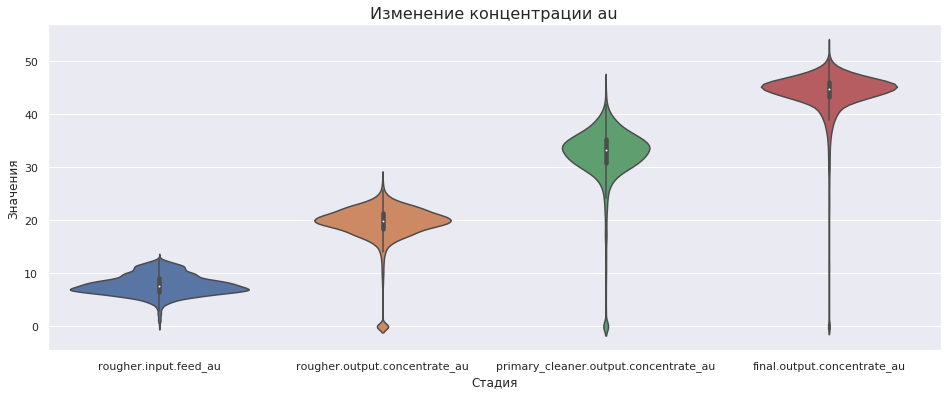

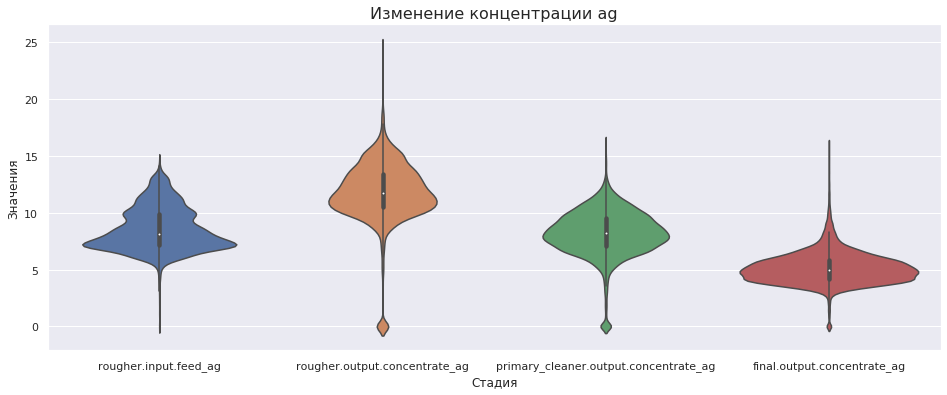

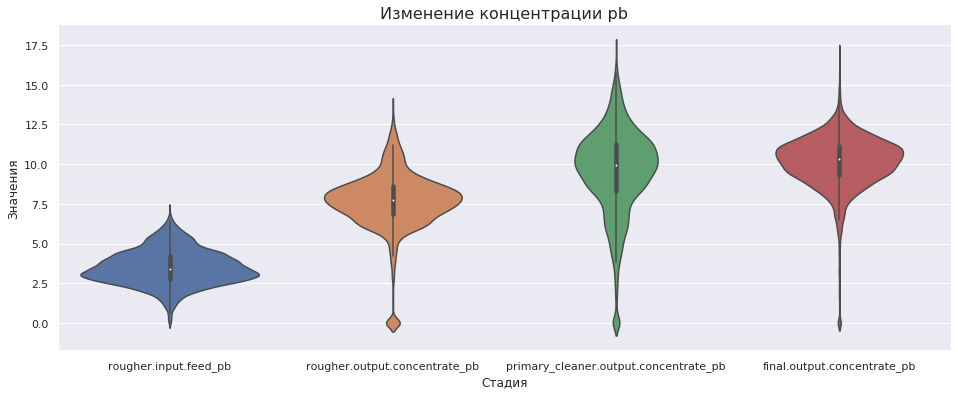

In [34]:
for metal in metals:
    cols = [s + metal for s in stages]
    plt.figure(figsize = (16,6))
    ax = sns.violinplot(data = train[cols])
    plt.title('Изменение концентрации '+metal, size = 16)
    plt.xlabel('Стадия')
    plt.ylabel('Значения');

Концентрация золота повышается с каждым этапом, концентрация свница также растет. Концентрация серебра растет после флотации, а затем уменьшается с каждой стадией. Есть нулевые значения, что, видимо, соответсвует пустой породе.

### Сравнение распределений размеров гранул сырья на обучающей и тестовой выборках.

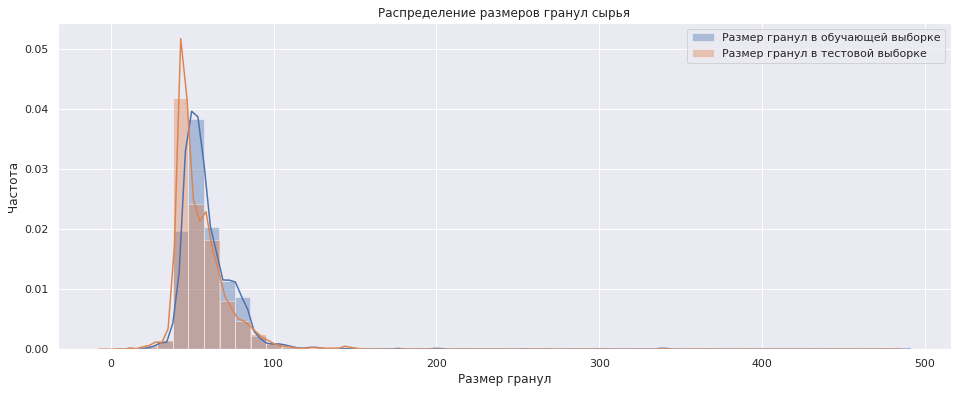

In [35]:
plt.figure(figsize = (16,6))
sns.distplot(train['rougher.input.feed_size'], label = 'Размер гранул в обучающей выборке')
sns.distplot(test['rougher.input.feed_size'], label = 'Размер гранул в тестовой выборке')
plt.title('Распределение размеров гранул сырья')
plt.xlabel('Размер гранул')
plt.ylabel('Частота')
plt.legend();

Распределения визуально похожи и не сильно отличаются друг от друга, так что оценка модели будет правильной.

### Исследование суммарной концентрации всех веществ на разных стадиях.

Проанализируем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Исследуем аномальные значения в суммарном распределении.

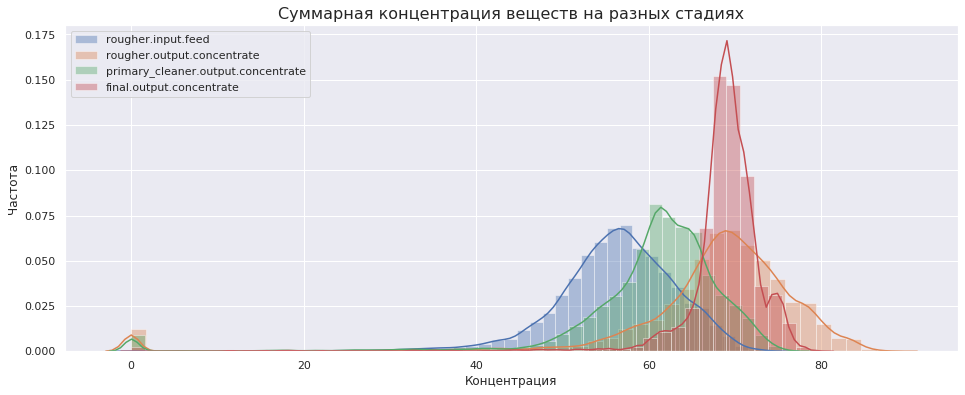

In [36]:
materials = metals + ['sol']
plt.figure(figsize = (16,6))
for s in stages:
    cols = [s + m for m in materials]
    csum = train[cols].apply(np.sum, axis = 1)
    sns.distplot(csum, label = s[:-1])
    plt.title('Суммарная концентрация веществ на разных стадиях', size = 16)
    plt.xlabel('Концентрация')
    plt.ylabel('Частота')
    plt.legend();

На графике есть очень низкие и нулевые значения. Приблизим график.

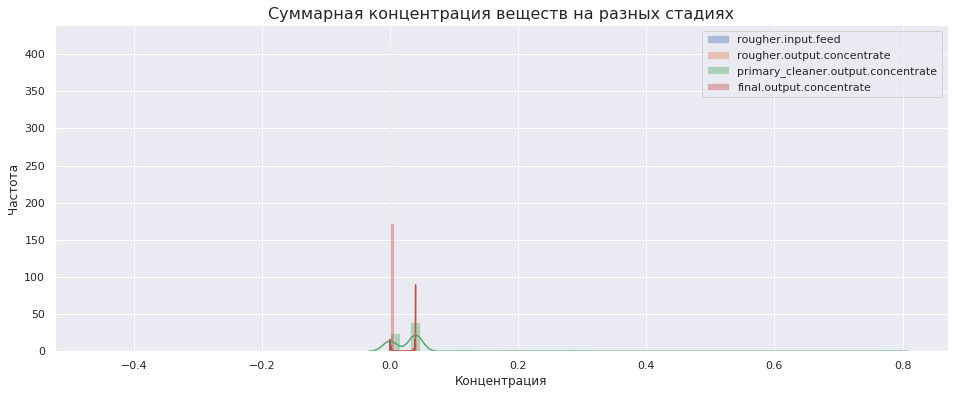

In [37]:
plt.figure(figsize = (16,6))
for s in stages:
    cols = [s + m for m in materials]
    csum = train[cols].apply(np.sum, axis = 1)
    sns.distplot(csum[csum<1], label = s[:-1])
    plt.title('Суммарная концентрация веществ на разных стадиях', size = 16)
    plt.xlabel('Концентрация')
    plt.ylabel('Частота')
    plt.legend();

Удалим аномальные значения до 0.2 и посмотрим на новое распределение.

In [38]:
for s in stages:
    cols = [s + m for m in materials]
    csum_train = train[cols].apply(np.sum, axis = 1)
    train_ids = csum_train[csum_train>0.2].index
    train = train.loc[train_ids, :]
    try:
        csum_test = test[cols].apply(np.sum, axis = 1)
        test_ids = csum_test[csum_test>0.2].index
        test = test.loc[test_ids, :]
    except: pass

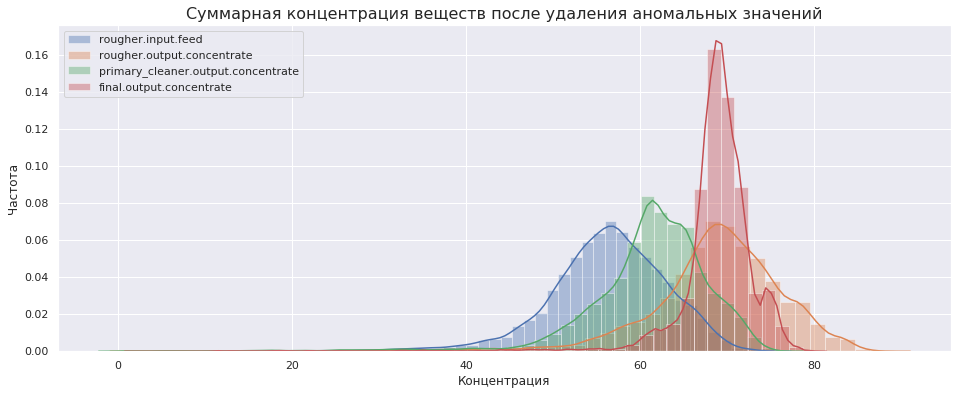

In [39]:
plt.figure(figsize = (16,6))
for s in stages:
    cols = [s + m for m in materials]
    csum = train[cols].apply(np.sum, axis = 1)
    sns.distplot(csum, label = s[:-1])
    plt.title('Суммарная концентрация веществ после удаления аномальных значений', size = 16)
    plt.xlabel('Концентрация')
    plt.ylabel('Частота')
    plt.legend();

In [40]:
test.shape

(5485, 53)

In [41]:
train.shape

(13601, 87)

## Модель

Напишем функцию для расчета метрики sMAPE.

In [42]:
def smape(true, predict):
    true = np.array(true)
    predict = np.array(predict)
    
    predict_rougher=predict[:,0]
    true_rougher=true[:,0]
    predict_final=predict[:,1]
    true_final=true[:,1]
    
    smape_rougher=np.sum(abs(true_rougher-predict_rougher)/((abs(true_rougher)+abs(predict_rougher))/2))
    smape_rougher=smape_rougher/len(true_rougher)*100
       
    smape_final=np.sum(abs(true_final-predict_final)/((abs(true_final)+abs(predict_final))/2))
    smape_final=smape_final/len(true_final)*100
    
    smape=0.25*smape_rougher+0.75*smape_final
    return smape

Разделим данные на features и target.  
Нужно спрогнозировать сразу две величины:
- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.

In [43]:
features_cols = test.columns
targets_cols = ['rougher.output.recovery','final.output.recovery']

In [44]:
features_train = train[features_cols]
features_train = features_train.drop(['date'],axis=1)
target_train = train[targets_cols]

In [45]:
features_test = full[full['date'].isin(test['date'])][test.columns].drop(columns = ['date'])
target_test = full[full['date'].isin(test['date'])][targets_cols]

In [46]:
rns = 2021

In [47]:
smape_scorer = make_scorer(smape, greater_is_better=False)

**Линейная регрессия**

In [48]:
%%time

lr = LinearRegression()
shuffle = KFold(n_splits=6, random_state=rns, shuffle=True)
print('SMAPE линейной регрессии: ', cross_val_score(lr, features_train, target_train, cv=shuffle, scoring=smape_scorer).mean())

SMAPE линейной регрессии:  -7.127141038218636
CPU times: user 810 ms, sys: 483 ms, total: 1.29 s
Wall time: 1.24 s


**Случайный лес**

In [49]:
%%time

rf = RandomForestRegressor()
shuffle = KFold(n_splits=6, random_state=rns, shuffle=True)
print('SMAPE случайного леса: ', cross_val_score(rf, features_train, target_train, cv=shuffle, scoring=smape_scorer).mean())

SMAPE случайного леса:  -5.0770880260459474
CPU times: user 39.3 s, sys: 33.7 ms, total: 39.3 s
Wall time: 39.7 s


Проверим модель случайного леса на тестовой выборке.

In [50]:
rf.fit(features_train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [123]:
predictions_rf = rf.predict(features_test)

In [52]:
smape(target_test, predictions_rf)

10.727303400254035

Проверим модель линейной регрессии на тестовой выборке.

In [119]:
lr.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
predictions_lr = lr.predict(features_test)

In [121]:
smape(target_test, predictions_lr)

9.354846952699297

Проверим модель, сравнив ее с константной:

In [114]:
predictions.shape

(5290, 2)

In [115]:
predictions1 = []
predictions2 = []
for i in range(len(predictions)):
    predictions1.append(predictions[:,0].mean())
    predictions2.append(predictions[:,1].mean())

In [116]:
predictions_const = np.column_stack([predictions1, predictions2])

In [117]:
predictions_const.shape

(5290, 2)

In [124]:
print('SMAPE константной модели', smape(target_test, predictions_const))
print('SMAPE линейной регресии', smape(target_test, predictions_lr))
print('SMAPE случайного леса', smape(target_test, predictions_rf))

SMAPE константной модели 10.373414203372011
SMAPE линейной регресии 9.354846952699297
SMAPE случайного леса 10.727303400254035


**Вывод**  
При сравнении моделей с константной моделью, которая всегда предсказывает среднее, лучший результат показла модель линейной регресии. Модель случайного леса показла результат хуже, чем константная модель. 